<a href="https://colab.research.google.com/github/Shinusei/BigData_MIREA/blob/master/prac2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Найти и выгрузить многомерные данные (с большим количеством
признаков – столбцов) с использованием библиотеки pandas.

In [107]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shivam2503/diamonds")

data = pd.read_csv(path+"/diamonds.csv")


Using Colab cache for faster access to the 'diamonds' dataset.


2.  Вывести информацию о данных при помощи методов .info(), .head().
Проверить данные на наличие пустых значений. В случае их наличия
удалить данные строки или интерполировать пропущенные значения.
При необходимости дополнительно предобработать данные для
дальнейшей работы с ними.

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [109]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [110]:
data.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


3. Построить столбчатую диаграмму (.bar) с использованием модуля
graph_objs из библиотеки Plotly со следующими параметрами:

In [111]:
import plotly.graph_objs as go

groups = data["cut"].value_counts()

plt = go.Figure(data=[
        go.Bar(x=groups.index.tolist(), y=groups,
               marker=dict(color=groups, coloraxis="coloraxis"),
               marker_line=dict(color='black', width=2),
               ),
      ]
)

plt.update_layout(title=dict(
        text="Разрезы алмазов",
        font=dict(size=20)), title_x=0.5)

plt.update_layout(
    xaxis=dict(
        title="Качаство разреза",
        title_font=dict(size=16),
        tickfont=dict(size=14),
        tickangle=315,
        gridwidth=2,
        gridcolor='ivory'
    ),

    yaxis=dict(
        title="Кол-во алмазов",
        title_font=dict(size=16),
        tickfont=dict(size=14),
        gridwidth=2,
        gridcolor='ivory'
    ),

    margin=dict(l=0, r=0, b=0),
    height=700
    )

plt.show()

4. Построить круговую диаграмму (go.Pie), использовав данные и стиль
оформления из предыдущего графика. Сделать так, чтобы границы
каждой доли были выделены чёрной линией с толщиной, равной 2 и
категории круговой диаграммы были читаемы (к примеру, объединить
часть объектов)

In [112]:
plt = go.Figure()
plt.add_trace(go.Pie(values=groups, labels=groups.index.tolist(),
                     marker_line=dict(color='black', width=2),
                     textinfo='label+percent',
                     textfont_size=14),
                     )

plt.update_layout(
    height=850,
    width=850,
    title="Разрезы алмазов",
    font=dict(size=20), title_x=0.5,
    margin=dict(l=0, r=0, b=0)
)
plt.show()

5. Построить линейные графики, взять один из параметров и определить
зависимость между другими несколькими (от 2 до 5) показателями с
использованием библиотеки matplotlib. Сделать вывод

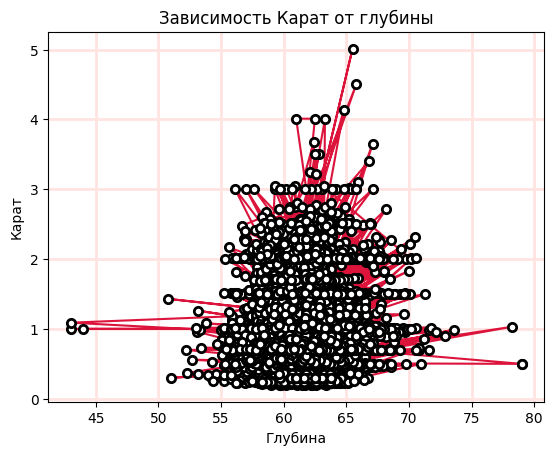

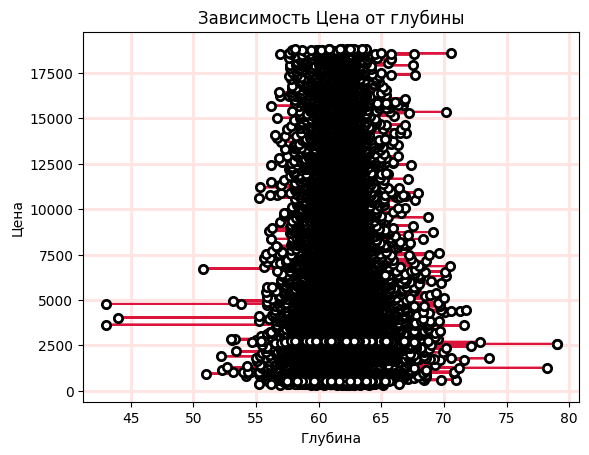

In [113]:
import matplotlib.pyplot as plt

x = data['depth']

def plot_builder(index, text):
    plt.plot(x, index, label=text, color='crimson', marker='o', markerfacecolor='white',
             markeredgecolor='black', markeredgewidth=2)
    plt.title(f'Зависимость {text} от глубины')
    plt.xlabel('Глубина')
    plt.ylabel(text)
    plt.grid(linewidth=2, color='mistyrose')
    plt.show()

plot_builder(data["carat"], "Карат")
plot_builder(data["price"], "Цена")

6. Выполнить визуализацию многомерных данных, используя t-SNE.
Необходимо использовать набор данных MNIST или fashion MNIST
(можно использовать и другие готовые наборы данных, где можно
наблюдать разделение объектов по кластерам). Рассмотреть
результаты визуализации для разных значений перплексии

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import time
import kagglehub

# 1. Загружаем датасет с KaggleHub
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")
data = pd.read_csv(path + "/test.csv")
print(data.isna().sum())
data.head(5)

Using Colab cache for faster access to the 'airline-passenger-satisfaction' dataset.
Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes         

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


Using Colab cache for faster access to the 'airline-passenger-satisfaction' dataset.


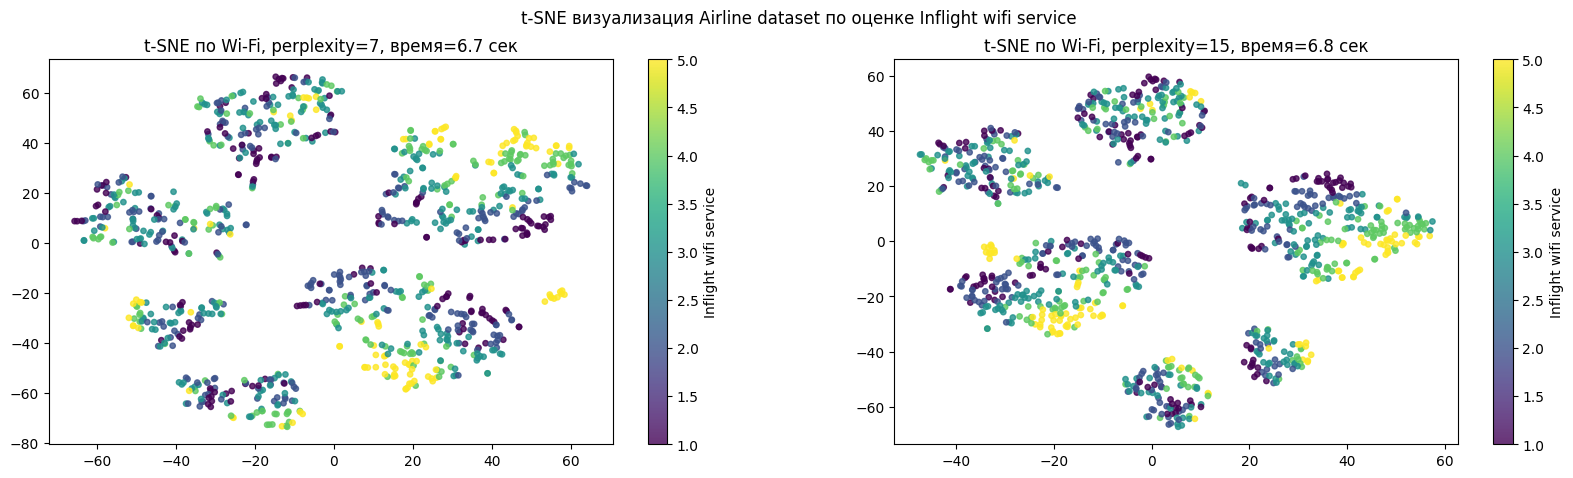

In [115]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
import time
import pandas as pd
import numpy as np
import kagglehub

# 1. Загружаем данные
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction")
data = pd.read_csv(path + "/test.csv")
data = data.dropna()
data = data.head(1000)  # для скорости

# 2. Обработка wifi: 0 -> NaN -> медиана
data["Inflight wifi service"] = data["Inflight wifi service"].replace(0, np.nan)
data["Inflight wifi service"] = data["Inflight wifi service"].fillna(
    data["Inflight wifi service"].median()
)

# 3. Подготовка признаков: числовые только для t-SNE
nd = data.drop(["satisfaction"], axis=1)
# кодируем категориальные как числа (Label Encoding через factorize)
for col in nd.select_dtypes(include=["object"]).columns:
    nd[col], _ = pd.factorize(nd[col])

# Масштабирование
scaler = MinMaxScaler()
nd = pd.DataFrame(scaler.fit_transform(nd), columns=nd.columns)

# 4. t-SNE визуализация по wifi
plt.figure(figsize=(20, 5))
i = 1
wifi_labels = sorted(data["Inflight wifi service"].unique())

for perplexity in [7, 15]:
    begin_time = time.time()
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=123)
    features = tsne.fit_transform(nd)
    elapsed = time.time() - begin_time

    plt.subplot(1, 2, i)
    sc = plt.scatter(
        x=features[:, 0],
        y=features[:, 1],
        c=data["Inflight wifi service"],
        cmap='viridis',  # лучше для градации оценок
        s=15,
        alpha=0.8
    )
    plt.colorbar(sc, label="Inflight wifi service")
    plt.title(f"t-SNE по Wi-Fi, perplexity={perplexity}, время={elapsed:.1f} сек")
    i += 1

plt.suptitle("t-SNE визуализация Airline dataset по оценке Inflight wifi service")
plt.show()


7. Выполнить визуализацию многомерных данных, используя UMAP с
различными параметрами n_neighbors и min_dist. Рассчитать время
работы алгоритма с помощью библиотеки time и сравнить его с
временем работы t-SNE.

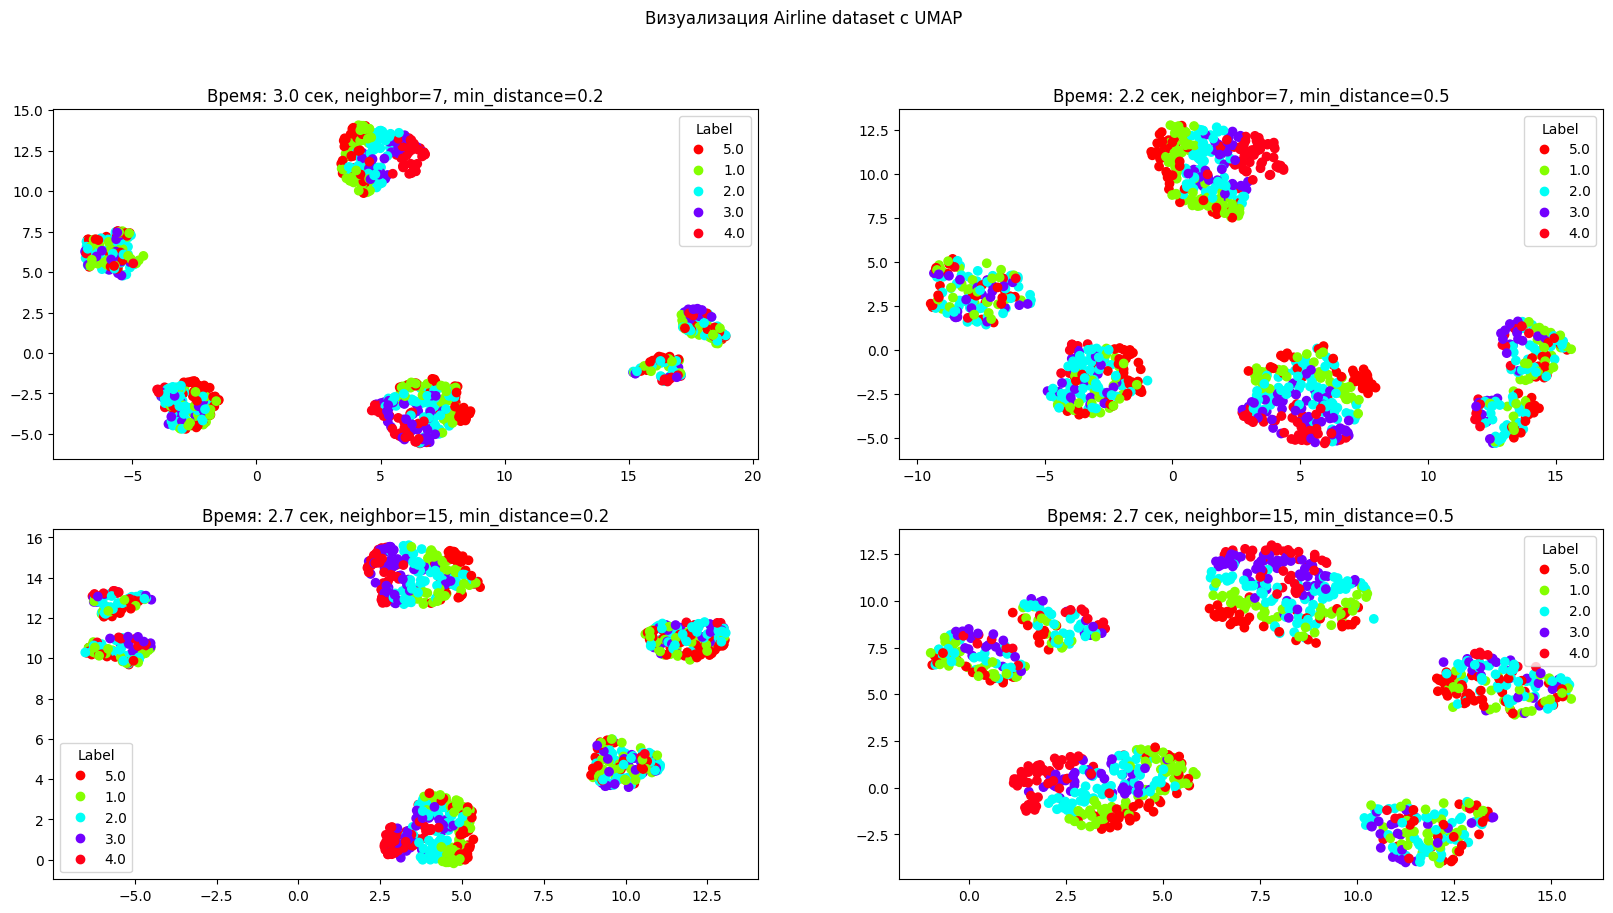

In [116]:
from umap import UMAP
import matplotlib.pyplot as plt
import time


plt.figure(figsize=(20,10))
i = 1
labels = [i for i in data["Inflight wifi service"].unique()]

for neighbor in [7, 15]:
  for minim_dist in [0.2, 0.5]:
    # Сжатие
    begin_time = time.time()
    U = UMAP(n_jobs=1,n_neighbors=neighbor, min_dist=minim_dist, random_state=123)
    features = U.fit_transform(nd)
    end_time = time.time() - begin_time

    #отрисовка
    plt.subplot(2,2,i)
    sc = plt.scatter(x=features[:,0],y=features[:,1],c=data["Inflight wifi service"], cmap='hsv')
    handles, _ = sc.legend_elements(prop="colors")
    plt.legend(handles, labels, title='Label')
    plt.title(f"Время: {end_time:.1f} сек, neighbor={neighbor}, min_distance={minim_dist}")
    i += 1

plt.suptitle('Визуализация Airline dataset с UMAP')
plt.show()
